1. [Testing calc_rsq](#Testing-calc_rsq)
    1. [Generating Random Correlation Matrices](#Generate-random-correlation-matrices)
    2. [Real Data](#Real-Data)
    3. [Try out the new icc function too](#Try-out-the-new-icc-function-too)
    4. [Generate known correlation matrices](#Generate-known-correlation-matrices)

# Testing `calc_rsq`

We're getting weird results from our iterations, so let's see what's going on. I'm going to run through this code in python2 and python3.

In [1]:
import sys
print (sys.version)

2.7.12 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [2]:
import numpy as np
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def exclude_nan(x,y):
    """
    Exclude NaN values if either entry in a pair of vectors has NaN
    """
    idx = np.logical_not(np.logical_or(np.isnan(x), np.isnan(y)))
    x = x[idx]
    y = y[idx]
    n = len(x)
    return [x, y, n]

def compute_icc(av_corr_mat_A, av_corr_mat_B):
    """
    This function computes the inter-class correlation (ICC) of the
    two classes represented by the x and y numpy vectors.
    """

    inds = np.triu_indices_from(av_corr_mat_B, k=1)
    x = av_corr_mat_A[inds]
    y = av_corr_mat_B[inds]
    
    if all(x == y):
        return 1

    [x, y, n] = exclude_nan(x,y)

    ## Need at least 3 data points to compute this
    if n < 3:
        return np.nan

    Sx = sum(x); Sy = sum(y);
    Sxx = sum(x*x); Sxy = sum( (x+y)**2 )/2; Syy = sum(y*y)

    fact = ((Sx + Sy)**2)/(n*2)
    SS_tot = Sxx + Syy - fact
    SS_among = Sxy - fact
    SS_error = SS_tot - SS_among

    MS_error = SS_error/n
    MS_among = SS_among/(n-1)
    ICC = (MS_among - MS_error) / (MS_among + MS_error)

    return ICC

In [4]:
def calc_rsq(av_corr_mat_A, av_corr_mat_B):
    """
    From wikipedia: https://en.wikipedia.org/wiki/Coefficient_of_determination
    
    Rsq = 1 - (SSres / SStot)
    
    SSres is calculated as the sum of square errors (where the error
    is the difference between x and y).
    
    SStot is calculated as the total sum of squares in y.
    """
    # Get the data we need
    inds = np.triu_indices_from(av_corr_mat_B, k=1)
    x = av_corr_mat_A[inds]
    y = av_corr_mat_B[inds]
    
    # Calculate the error/residuals
    res = y - x

    SSres = np.sum(res**2)
    
    # Sum up the total error in y
    y_var = y - np.mean(y)
    
    SStot = np.sum(y_var**2)
    
    # R squared
    Rsq = 1 - (SSres/SStot)
    
    return Rsq

## Generate random correlation matrices

In [5]:
df1 = pd.DataFrame(np.random.normal(0, 1, size=(100, 20)))
df2 = pd.DataFrame(np.random.normal(0, 1, size=(100, 20)))
df1corrmat = df1.corr()
df2corrmat = df2.corr()

In [6]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.323286,-1.261561,0.161457,0.323586,-1.379817,-0.020344,1.581908,-0.981165,-0.821899,-0.294345,0.571074,-1.380971,-1.747225,-0.375620,1.528451,-0.123124,-0.713992,-1.323604,-1.315525,0.690663
1,0.729497,1.703315,0.602976,-0.231540,-1.250446,-0.114828,-0.594561,-0.302703,0.184247,-0.821777,-0.483644,-0.304659,-0.311395,2.937970,-1.646396,-0.586491,-0.831024,-0.924894,1.345643,1.963867
2,1.170983,0.859102,0.459607,0.163407,0.218844,-2.241736,0.440186,0.683137,2.094869,1.774836,0.395972,0.488446,-0.443513,-2.306835,-1.267938,0.076475,1.139498,0.512079,-0.346902,1.049746
3,1.415495,-0.546004,0.586698,0.094803,0.073657,0.030180,1.425866,-1.809567,-0.751821,1.575186,-0.242439,0.932921,0.260262,-0.469886,1.048729,0.920641,0.532457,1.216244,-0.467475,-1.159274
4,0.737843,1.440931,-0.688607,0.445227,-0.985570,-0.089782,0.926790,-0.695409,1.516486,-0.333063,-0.536686,-1.722324,0.138058,0.303989,-0.783767,1.195260,0.110486,0.579499,0.079151,1.010022


In [7]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.269707,1.253288,-1.186958,-2.373917,-1.077238,-0.984896,1.262270,1.306861,3.515655,0.360655,0.942390,0.230940,-1.401192,0.775589,1.635970,-2.104833,-0.096495,0.553668,-0.435079,-0.104131
1,-0.495095,-0.183682,1.008054,-0.346687,-0.665937,1.589092,1.486974,-0.205789,0.391588,-0.936323,-1.882688,1.153283,0.007100,0.026119,0.162887,-0.910703,-0.521514,0.267147,-0.022594,-0.970567
2,0.518818,1.339423,-0.625257,-0.040747,0.047749,-0.736272,-0.615431,-0.173592,-1.456468,-0.359264,0.289824,0.199504,0.796666,-0.263096,-0.984761,-0.489424,-1.197302,-0.584935,0.194262,1.103751
3,-0.445446,0.262548,1.367027,-0.057745,0.015555,-0.945286,1.602501,-0.087316,-0.493818,0.433879,0.759188,1.350213,-1.062336,-1.230664,0.074010,1.209510,0.964752,-0.970977,-1.049910,0.665741
4,-1.845951,0.948408,0.672447,0.680604,-0.811630,0.066090,-0.335433,-0.340869,0.010720,-1.060185,0.248511,1.619457,-1.205659,0.867671,0.125576,-0.266633,1.370392,1.077994,0.660532,-0.146329


In [8]:
df1corrmat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,-0.049079,0.000680,-0.044020,0.104071,-0.093254,0.152600,-0.107223,-0.025141,0.114999,-0.004768,-0.092461,0.060406,-0.004981,0.018038,0.053250,0.063561,0.051068,-0.148448,-0.167564
1,-0.049079,1.000000,-0.056281,0.030446,-0.062546,0.068446,-0.113503,0.002790,-0.014185,0.121374,0.035345,-0.081416,-0.055063,0.015882,0.042466,-0.077507,-0.012569,0.095243,0.035763,0.110906
2,0.000680,-0.056281,1.000000,-0.143367,-0.041676,-0.164841,0.011819,0.049649,-0.034181,-0.047347,-0.015702,-0.113259,0.033673,-0.020542,0.089430,-0.037078,0.082698,0.054048,0.066776,0.131325
3,-0.044020,0.030446,-0.143367,1.000000,-0.096209,0.050667,-0.077431,-0.059190,-0.112970,-0.007465,0.131263,0.090420,-0.000402,0.003129,-0.093457,-0.031443,0.009854,-0.025744,-0.062368,-0.020955
4,0.104071,-0.062546,-0.041676,-0.096209,1.000000,-0.032727,-0.026356,-0.022043,0.012085,0.166900,0.051254,0.181741,0.007037,-0.108186,-0.034811,-0.066710,-0.052175,-0.066902,0.089852,-0.075483


In [9]:
df2corrmat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.061702,-0.053623,-0.176968,0.192372,-0.098495,0.045514,-0.213367,0.004839,0.024899,-0.121557,-0.125134,-0.005041,0.032674,0.052919,0.066500,0.030229,-0.073471,-0.073859,-0.068004
1,0.061702,1.000000,-0.000289,0.007261,0.007096,-0.076085,0.059441,-0.052329,-0.149076,0.186514,0.121011,-0.118650,-0.035480,-0.025540,-0.016688,0.167553,0.227770,-0.069753,0.040998,-0.127718
2,-0.053623,-0.000289,1.000000,-0.066762,0.065686,0.115954,0.014206,-0.110749,0.023382,0.075764,-0.059849,0.050319,-0.135321,-0.035363,-0.111130,-0.099274,-0.000440,-0.116039,-0.058640,-0.151096
3,-0.176968,0.007261,-0.066762,1.000000,-0.022392,0.108363,0.125743,-0.028401,-0.056243,-0.178711,-0.143397,-0.056222,-0.016699,0.163597,-0.066043,-0.001810,-0.075082,0.051780,0.139075,-0.045854
4,0.192372,0.007096,0.065686,-0.022392,1.000000,-0.121684,0.035241,-0.179024,0.069831,0.087531,-0.045961,-0.065434,-0.091380,-0.125179,0.050861,0.146451,-0.093377,0.006593,-0.074882,-0.011044


### Calculate $R^2$ from random matrices

In [10]:
calc_rsq(df1.corr().as_matrix(), df2.corr().as_matrix())

-0.79208677495621727

Now let's walk through the code above to see what it's doing.

In [11]:
inds = np.triu_indices_from( df2.corr().as_matrix(), k=1)
inds

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13,
        13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16,
        17, 17, 18]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14

In [12]:
x =  df1.corr().as_matrix()[inds]
y =  df2.corr().as_matrix()[inds]

In [13]:
print(str(df1.corr().shape) + " matrix gives an upper triangle with length " + str((20*(20-1))/2))

(20, 20) matrix gives an upper triangle with length 190


`df.corr()` is a $20\times 20$ matrix, so getting the upper triangle should give us $\frac{20\cdot (20-1)}{2}=190$ cells in the upper triangle.

In [14]:
len(x)

190

Yay, we get what we expect!

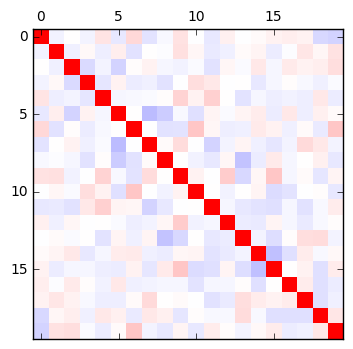

In [15]:
plt.matshow(df1.corr(), vmin=-1, vmax=1, cmap='bwr')

In [16]:
df1.corr().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.00,-0.05,0.00,-0.04,0.10,-0.09,0.15,-0.11,-0.03,0.11,-0.00,-0.09,0.06,-0.00,0.02,0.05,0.06,0.05,-0.15,-0.17
1,-0.05,1.00,-0.06,0.03,-0.06,0.07,-0.11,0.00,-0.01,0.12,0.04,-0.08,-0.06,0.02,0.04,-0.08,-0.01,0.10,0.04,0.11
2,0.00,-0.06,1.00,-0.14,-0.04,-0.16,0.01,0.05,-0.03,-0.05,-0.02,-0.11,0.03,-0.02,0.09,-0.04,0.08,0.05,0.07,0.13
3,-0.04,0.03,-0.14,1.00,-0.10,0.05,-0.08,-0.06,-0.11,-0.01,0.13,0.09,-0.00,0.00,-0.09,-0.03,0.01,-0.03,-0.06,-0.02
4,0.10,-0.06,-0.04,-0.10,1.00,-0.03,-0.03,-0.02,0.01,0.17,0.05,0.18,0.01,-0.11,-0.03,-0.07,-0.05,-0.07,0.09,-0.08
5,-0.09,0.07,-0.16,0.05,-0.03,1.00,0.00,-0.26,-0.20,-0.03,-0.12,0.04,-0.02,0.04,0.07,-0.08,0.09,-0.06,0.06,0.02
6,0.15,-0.11,0.01,-0.08,-0.03,0.00,1.00,-0.00,-0.11,-0.11,0.22,0.04,-0.07,-0.06,0.08,0.05,-0.06,0.02,-0.08,0.22
7,-0.11,0.00,0.05,-0.06,-0.02,-0.26,-0.00,1.00,0.02,0.13,-0.00,-0.17,-0.04,0.04,-0.06,-0.10,-0.04,0.14,0.09,-0.04
8,-0.03,-0.01,-0.03,-0.11,0.01,-0.20,-0.11,0.02,1.00,0.01,-0.05,-0.09,0.03,-0.23,-0.07,0.09,-0.04,0.00,0.06,-0.09
9,0.11,0.12,-0.05,-0.01,0.17,-0.03,-0.11,0.13,0.01,1.00,0.05,-0.00,0.20,-0.15,0.04,0.23,-0.04,0.02,-0.10,0.04


In [17]:
x.round(2)

array([-0.05,  0.  , -0.04,  0.1 , -0.09,  0.15, -0.11, -0.03,  0.11,
       -0.  , -0.09,  0.06, -0.  ,  0.02,  0.05,  0.06,  0.05, -0.15,
       -0.17, -0.06,  0.03, -0.06,  0.07, -0.11,  0.  , -0.01,  0.12,
        0.04, -0.08, -0.06,  0.02,  0.04, -0.08, -0.01,  0.1 ,  0.04,
        0.11, -0.14, -0.04, -0.16,  0.01,  0.05, -0.03, -0.05, -0.02,
       -0.11,  0.03, -0.02,  0.09, -0.04,  0.08,  0.05,  0.07,  0.13,
       -0.1 ,  0.05, -0.08, -0.06, -0.11, -0.01,  0.13,  0.09, -0.  ,
        0.  , -0.09, -0.03,  0.01, -0.03, -0.06, -0.02, -0.03, -0.03,
       -0.02,  0.01,  0.17,  0.05,  0.18,  0.01, -0.11, -0.03, -0.07,
       -0.05, -0.07,  0.09, -0.08,  0.  , -0.26, -0.2 , -0.03, -0.12,
        0.04, -0.02,  0.04,  0.07, -0.08,  0.09, -0.06,  0.06,  0.02,
       -0.  , -0.11, -0.11,  0.22,  0.04, -0.07, -0.06,  0.08,  0.05,
       -0.06,  0.02, -0.08,  0.22,  0.02,  0.13, -0.  , -0.17, -0.04,
        0.04, -0.06, -0.1 , -0.04,  0.14,  0.09, -0.04,  0.01, -0.05,
       -0.09,  0.03,

These also match, so that's good. Time to walk through the $R^2$ calculation.

In [18]:
res = y - x
res

array([  1.10780526e-01,  -5.43032295e-02,  -1.32947983e-01,
         8.83014981e-02,  -5.24033732e-03,  -1.07085805e-01,
        -1.06144165e-01,   2.99802083e-02,  -9.00994821e-02,
        -1.16789220e-01,  -3.26733218e-02,  -6.54461593e-02,
         3.76553330e-02,   3.48811564e-02,   1.32499778e-02,
        -3.33313704e-02,  -1.24538564e-01,   7.45887957e-02,
         9.95602285e-02,   5.59910911e-02,  -2.31847789e-02,
         6.96421753e-02,  -1.44530792e-01,   1.72944022e-01,
        -5.51189243e-02,  -1.34890588e-01,   6.51393591e-02,
         8.56664928e-02,  -3.72336783e-02,   1.95821447e-02,
        -4.14219596e-02,  -5.91541907e-02,   2.45060686e-01,
         2.40339030e-01,  -1.64996000e-01,   5.23527481e-03,
        -2.38623183e-01,   7.66051965e-02,   1.07361642e-01,
         2.80795718e-01,   2.38726622e-03,  -1.60397703e-01,
         5.75630321e-02,   1.23110793e-01,  -4.41461906e-02,
         1.63578179e-01,  -1.68993611e-01,  -1.48210393e-02,
        -2.00559875e-01,

In [19]:
SSres = np.sum(res**2)
SSres

3.4861819328465149

In [20]:
# Sum up the total error in y
y_var = y - np.mean(y)
y_var

array([ 0.07040468, -0.04491989, -0.16826466,  0.20107511, -0.08979166,
        0.05421742, -0.20466391,  0.0135418 ,  0.03360214, -0.11285442,
       -0.11643136,  0.00366243,  0.04137716,  0.06162184,  0.07520288,
        0.03893227, -0.06476768, -0.0651558 , -0.05930058,  0.00841357,
        0.01596414,  0.01579898, -0.06738159,  0.0681437 , -0.04362566,
       -0.14037287,  0.1952166 ,  0.12971429, -0.10994682, -0.02677736,
       -0.01683686, -0.00798537,  0.1762564 ,  0.23647348, -0.06104967,
        0.04970138, -0.11901457, -0.05805863,  0.07438901,  0.12465743,
        0.02290946, -0.10204552,  0.0320851 ,  0.08446659, -0.05114569,
        0.05902186, -0.12661795, -0.02666004, -0.10242681, -0.09057124,
        0.00826284, -0.10733637, -0.04993719, -0.14239285, -0.0136887 ,
        0.11706579,  0.13444566, -0.01969779, -0.04753988, -0.17000826,
       -0.13469409, -0.04751902, -0.00799568,  0.17229965, -0.05734027,
        0.00689337, -0.0663795 ,  0.06048273,  0.14777767, -0.03

In [21]:
SStot = np.sum(y_var**2)
SStot

1.9453198257833728

In [22]:
# R squared
Rsq = 1 - (SSres/SStot)
Rsq

-0.79208677495621727

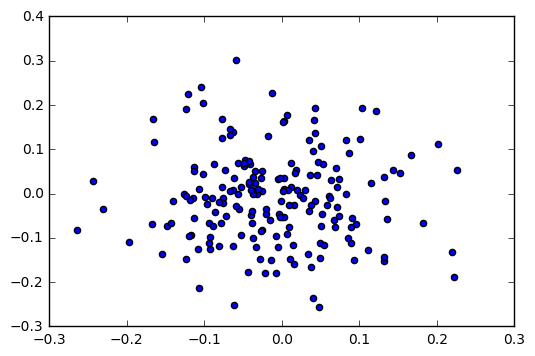

In [23]:
plt.scatter(x, y)

### Conclusion

Python 3: This works as expected, but we had to use `as_matrix()` to get it to not error in `calc_rsq()`.
Python 2: This works as expected, but we had to use `as_matrix()` to get it to not error in `calc_rsq()`.

# Real Data

In [24]:
behav_data_f = 'Phenotypic_V1_0b_preprocessed1.csv'

In [25]:
df = pd.read_csv(behav_data_f)
df = df.loc[df['func_perc_fd'].notnull(), :]
df = df.loc[df['FILE_ID']!='no_filename', :]
df['AGE_YRS'] = np.floor(df['AGE_AT_SCAN'])
df.head()

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP,AGE_YRS
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,24.0
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,19.0
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0,13.0
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,...,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1,13.0
5,5,6,50007,6,50007,PITT,Pitt_0050007,1,1,17.78,...,OK,NaN,maybe,ic-cerebellum_temporal_lob,OK,NaN,OK,NaN,1,17.0


In [26]:
nsubs = 100
start1 = 0
start2 = 100
for i, (sub, f_id) in enumerate(df.loc[start1:(start1+nsubs),['SUB_ID', 'FILE_ID']].values):
    #read each subjects aal roi time series files
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #create a correlation matrix from the roi all time series files
    corr_mat = ts_df.corr()

    #for the first subject, add a correlation matrix of zeros that is the same dimensions as the aal roi-roi matrix
    if i == 0:
        all_corr_mat1 = np.empty([corr_mat.shape[0], corr_mat.shape[1], nsubs])

    #now add the correlation matrix you just created for each subject to the all_corr_mat matrix (3D)
    all_corr_mat1[:, :, i] = corr_mat

#create the mean correlation matrix (ignore nas - sometime there are some...)
av_corr_mat1 = np.nanmean(all_corr_mat1, axis=2)

for i, (sub, f_id) in enumerate(df.loc[start2:(start2+nsubs),['SUB_ID', 'FILE_ID']].values):
    #read each subjects aal roi time series files
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #create a correlation matrix from the roi all time series files
    corr_mat = ts_df.corr()

    #for the first subject, add a correlation matrix of zeros that is the same dimensions as the aal roi-roi matrix
    if i == 0:
        all_corr_mat2 = np.empty([corr_mat.shape[0], corr_mat.shape[1], nsubs])

    #now add the correlation matrix you just created for each subject to the all_corr_mat matrix (3D)
    all_corr_mat2[:, :, i] = corr_mat

#create the mean correlation matrix (ignore nas - sometime there are some...)
av_corr_mat2 = np.nanmean(all_corr_mat2, axis=2)

In [27]:
[all_corr_mat1.shape, all_corr_mat2.shape]

[(116, 116, 100), (116, 116, 100)]

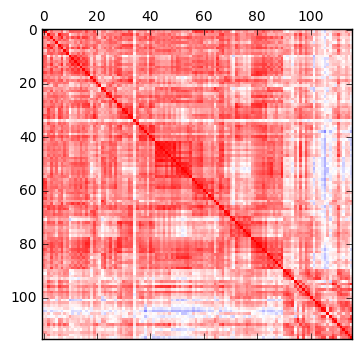

In [28]:
plt.matshow(all_corr_mat1[:,:,0], vmin=-1, vmax=1, cmap='bwr')

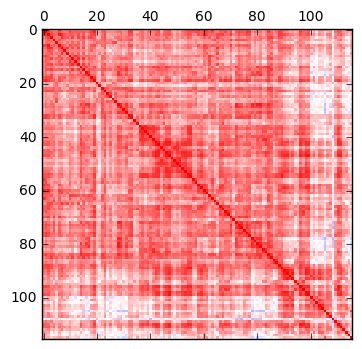

In [29]:
plt.matshow(all_corr_mat1[:,:,9], vmin=-1, vmax=1, cmap='bwr')

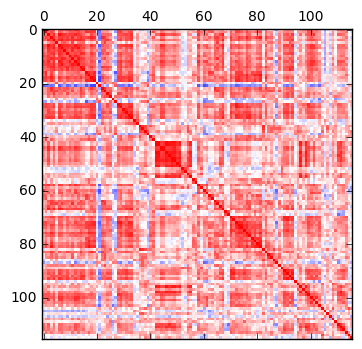

In [30]:
plt.matshow(all_corr_mat2[:,:,0], vmin=-1, vmax=1, cmap='bwr')

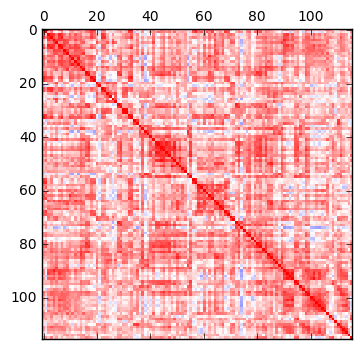

In [31]:
plt.matshow(all_corr_mat2[:,:,9], vmin=-1, vmax=1, cmap='bwr')

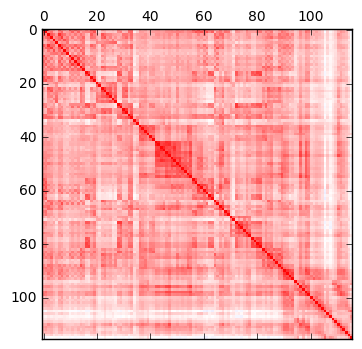

In [32]:
plt.matshow(av_corr_mat1, vmin=-1, vmax=1, cmap='bwr')

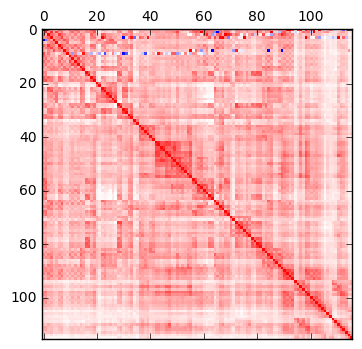

In [33]:
plt.matshow(av_corr_mat2, vmin=-1, vmax=1, cmap='bwr')

In [34]:
np.fill_diagonal(av_corr_mat1, 0)
np.fill_diagonal(av_corr_mat2, 0)

np.round([(av_corr_mat1.min(), av_corr_mat1.max()), (av_corr_mat2.min(), av_corr_mat2.max())])

array([[ -0.00000000e+000,   1.00000000e+000],
       [ -1.22291898e+229,   2.15223028e+135]])

In [35]:
np.fill_diagonal(all_corr_mat1[:,:,89], 0)
np.fill_diagonal(all_corr_mat1[:,:,66], 0)

np.round([(all_corr_mat1[:,:,89].min(), all_corr_mat1[:,:,89].max()), (all_corr_mat1[:,:,66].min(), all_corr_mat1[:,:,66].max())], 2)

array([[-0.27,  0.94],
       [-0.53,  0.93]])

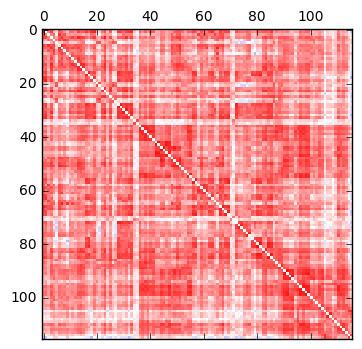

In [36]:
plt.matshow(all_corr_mat1[:,:,89], vmin=-1, vmax=1, cmap='bwr')

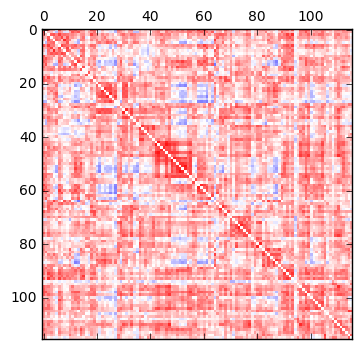

In [37]:
plt.matshow(all_corr_mat1[:,:,66], vmin=-1, vmax=1, cmap='bwr')

In [38]:
calc_rsq(av_corr_mat1, av_corr_mat2)

nan

Apparently we need to Fisher *z* transform them, which is equivalent to the arctanh function.

In [39]:
nsubs = 100
start1 = 0
start2 = 100
for i, (sub, f_id) in enumerate(df.loc[start1:(start1+nsubs),['SUB_ID', 'FILE_ID']].values):
    #read each subjects aal roi time series files
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #create a correlation matrix from the roi all time series files
    corr_mat_r = ts_df.corr()
    corr_mat_z = np.arctanh(corr_mat_r)

    #for the first subject, add a correlation matrix of zeros that is the same dimensions as the aal roi-roi matrix
    if i == 0:
        all_corr_mat1_z = np.zeros([corr_mat_z.shape[0], corr_mat_z.shape[1], nsubs])

    #now add the correlation matrix you just created for each subject to the all_corr_mat matrix (3D)
    all_corr_mat1_z[:, :, i] = corr_mat_z

#create the mean correlation matrix (ignore nas - sometime there are some...)
av_corr_mat1_z = np.nanmean(all_corr_mat1_z, axis=2)

for i, (sub, f_id) in enumerate(df.loc[start2:(start2+nsubs),['SUB_ID', 'FILE_ID']].values):
    #read each subjects aal roi time series files
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #create a correlation matrix from the roi all time series files
    corr_mat_r = ts_df.corr()
    corr_mat_z = np.arctanh(corr_mat_r)
    
    #for the first subject, add a correlation matrix of zeros that is the same dimensions as the aal roi-roi matrix
    if i == 0:
        all_corr_mat2_z = np.zeros([corr_mat_z.shape[0], corr_mat_z.shape[1], nsubs])

    #now add the correlation matrix you just created for each subject to the all_corr_mat matrix (3D)
    all_corr_mat2_z[:, :, i] = corr_mat_z

#create the mean correlation matrix (ignore nas - sometime there are some...)
av_corr_mat2_z = np.nanmean(all_corr_mat2_z, axis=2)

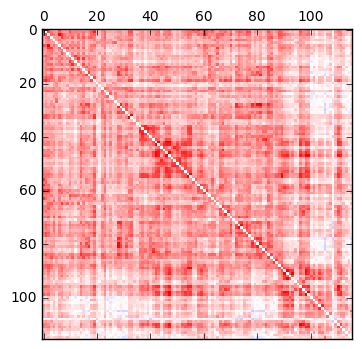

In [40]:
plt.matshow(all_corr_mat1_z[:,:,9], vmin=-1.5, vmax=1.5, cmap='bwr')

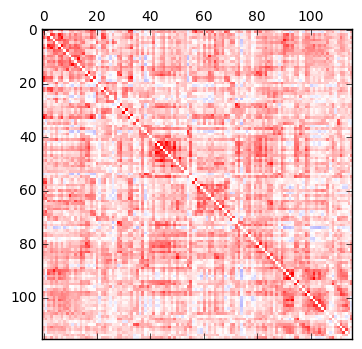

In [41]:
plt.matshow(all_corr_mat2_z[:,:,9], vmin=-1.5, vmax=1.5, cmap='bwr')

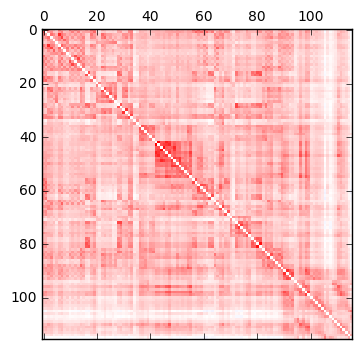

In [42]:
plt.matshow(av_corr_mat1_z, vmin=-1.5, vmax=1.5, cmap='bwr')

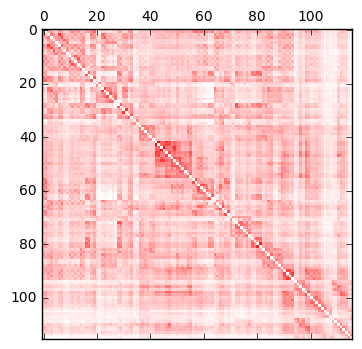

In [43]:
plt.matshow(av_corr_mat2_z, vmin=-1.5, vmax=1.5, cmap='bwr')

In [44]:
np.fill_diagonal(av_corr_mat1_z, 0)
np.fill_diagonal(av_corr_mat2_z, 0)

np.round([(av_corr_mat1_z.min(), av_corr_mat1_z.max()), (av_corr_mat2_z.min(), av_corr_mat2_z.max())],4)

array([[-0.0752,  1.6009],
       [-0.0198,  1.4522]])

In [45]:
calc_rsq(av_corr_mat1_z, av_corr_mat2_z)

0.82211375388083741

In [46]:
calc_rsq(np.random.normal(0,.0001, size=(190,190)), np.random.normal(0,.0001, size=(190,190)))

-0.98254241493378891

In [47]:
covmat = np.zeros((190, 190))
means = np.zeros(190)
np.fill_diagonal(covmat, 1)
datas1=pd.DataFrame(data=np.random.multivariate_normal(means, covmat, size=100))
datas2=pd.DataFrame(data=np.random.multivariate_normal(means, covmat, size=100))
datas1.shape

(100, 190)

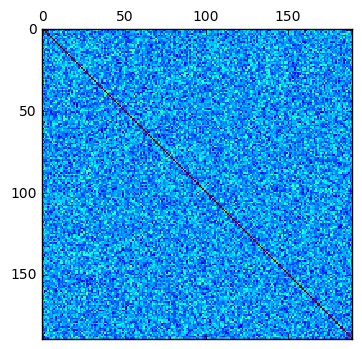

In [48]:
plt.matshow(datas1.corr())

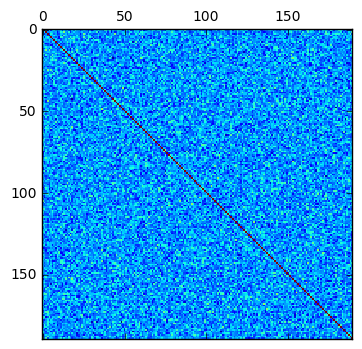

In [49]:
plt.matshow(datas2.corr())

In [50]:
calc_rsq(datas1.corr().as_matrix(), datas2.corr().as_matrix())

-0.9875194548274806

## Try out the new icc function too

In [51]:
compute_icc(datas1.corr().as_matrix(), datas2.corr().as_matrix())

0.0052820465777162163

In [52]:
compute_icc(av_corr_mat1_z, av_corr_mat2_z)

0.92101435582748625

## Generate known correlation matrices

from [Cross Validated](http://stats.stackexchange.com/a/125017/16294)

$d$ is the number of dimensions, and `betaparam` controls the width of distribution of correlations

```
function S = vineBeta(d, betaparam)
    P = zeros(d);           %// storing partial correlations
    S = eye(d);

    for k = 1:d-1
        for i = k+1:d
            P(k,i) = betarnd(betaparam,betaparam); %// sampling from beta
            P(k,i) = (P(k,i)-0.5)*2;     %// linearly shifting to [-1, 1]
            p = P(k,i);
            for l = (k-1):-1:1 %// converting partial correlation to raw correlation
                p = p * sqrt((1-P(l,i)^2)*(1-P(l,k)^2)) + P(l,i)*P(l,k);
            end
            S(k,i) = p;
            S(i,k) = p;
        end
    end

    %// permuting the variables to make the distribution permutation-invariant
    permutation = randperm(d);
    S = S(permutation, permutation);
end
```